In [74]:
# Case Study 1: Sales Analysis
# Problem Statement:
# You have a dataset containing sales data with information like product ID, sales quantity, and revenue. Perform the following
# tasks:

# Load the dataset and inspect its structure.
# Clean the data (handle missing values, duplicates, etc.).
# Calculate total revenue and quantity sold for each product.
# Find the top-selling products.
# Analyze monthly sales trends.


In [75]:
import pandas as pd
import numpy as np

In [76]:
sales_data ={
    "date":['2024-02-11','2024-02-12','2024-02-13','2024-02-14','2024-02-15','2024-02-16','2024-03-17','2024-03-18','2024-03-19'
           ,'2024-03-20','2024-03-21','2024-03-22'],
    "product_Id":['001','002','002','003','002','004','001','005','006','007','008','003'],
    "quantity_sold":[4,7,10,8,15,9,13,16,5,3,2,7],
    "total_revenue":[800,1400,2000,1600,3000,1800,2600,3200,1000,600,400,1400]
}

# Load the dataset into a Pandas DataFrame.

In [77]:
df=pd.DataFrame(sales_data)                                  # Load dataset
df

,date,product_Id,quantity_sold,total_revenue
0,2024-02-11,001,4,800
1,2024-02-12,002,7,1400
2,2024-02-13,002,10,2000
3,2024-02-14,003,8,1600
4,2024-02-15,002,15,3000
5,2024-02-16,004,9,1800
6,2024-03-17,001,13,2600
7,2024-03-18,005,16,3200
8,2024-03-19,006,5,1000
9,2024-03-20,007,3,600


# Inspecting its structure.

In [78]:
df.head()

,date,product_Id,quantity_sold,total_revenue
0,2024-02-11,001,4,800
1,2024-02-12,002,7,1400
2,2024-02-13,002,10,2000
3,2024-02-14,003,8,1600
4,2024-02-15,002,15,3000


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           12 non-null     object
 1   product_Id     12 non-null     object
 2   quantity_sold  12 non-null     int64 
 3   total_revenue  12 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 512.0+ bytes


In [80]:
df.describe()

,quantity_sold,total_revenue
count,12.00000,12.00000
mean,8.25000,1650.00000
std,4.57513,915.02608
min,2.00000,400.00000
25%,4.75000,950.00000
50%,7.50000,1500.00000
75%,10.75000,2150.00000
max,16.00000,3200.00000


# Clean the data (handle missing values, duplicates, etc.).

In [81]:
# check Missing Values in a data

In [82]:
df.isnull().sum()

date             0
product_Id       0
quantity_sold    0
total_revenue    0
dtype: int64

In [83]:
# drop Missing values

In [84]:
df = df.dropna() 
df.isnull().sum()

date             0
product_Id       0
quantity_sold    0
total_revenue    0
dtype: int64

In [85]:
# check duplicate values

In [86]:
df.drop_duplicates()

,date,product_Id,quantity_sold,total_revenue
0,2024-02-11,001,4,800
1,2024-02-12,002,7,1400
2,2024-02-13,002,10,2000
3,2024-02-14,003,8,1600
4,2024-02-15,002,15,3000
5,2024-02-16,004,9,1800
6,2024-03-17,001,13,2600
7,2024-03-18,005,16,3200
8,2024-03-19,006,5,1000
9,2024-03-20,007,3,600


# Calculate total revenue and quantity sold for each product.

In [87]:
totalrevenue=df['total_revenue'].sum()
print(totalrevenue)

19800


In [88]:
quantity_sold_each_product = df.groupby('product_Id')['quantity_sold'].sum()
print(quantity_sold_each_product)

product_Id
001    17
002    32
003    15
004     9
005    16
006     5
007     3
008     2
Name: quantity_sold, dtype: int64


# Find the top-selling products.

In [89]:
quantity_sold_each_product.head(1)

product_Id
001    17
Name: quantity_sold, dtype: int64

# Analyze monthly sales trends.

In [90]:
df['date'] = pd.to_datetime(df['date'])                     # Convert date to datetime format

In [91]:
df['Month'] = df['date'].dt.month                           # Extract month from date

In [92]:
monthly_sales = df.groupby('Month').agg({'quantity_sold': 'sum', 'total_revenue': 'sum'})
print("\nMonthly Sales Trends:")
print(monthly_sales)


Monthly Sales Trends:
       quantity_sold  total_revenue
Month                              
2                 53          10600
3                 46           9200


In [93]:
import matplotlib.pyplot as plt

In [94]:
monthly_sales = monthly_sales.reset_index()          #Reset index to have Month as a column

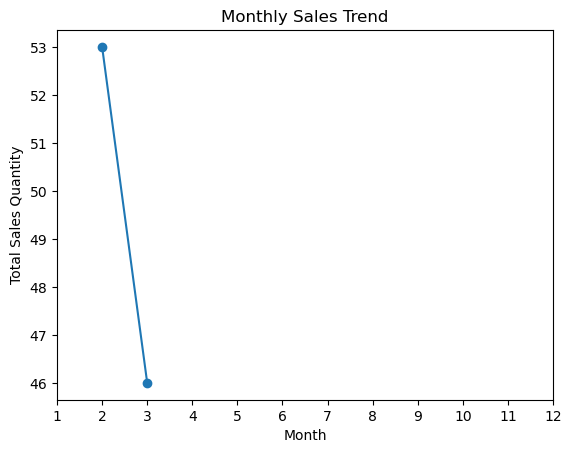

In [95]:
#Plotting trend line
plt.plot(monthly_sales['Month'], monthly_sales['quantity_sold'], marker='o', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Quantity')
plt.xticks(range(1, 13))  
plt.show()

In [96]:
# Case Study 2: Employee Performance Analysis
# Problem Statement:
# You have a dataset with information about employees, including their performance ratings, years of experience, and department.
# Perform the following tasks:

# Load the dataset and understand its structure.
# Explore the distribution of performance ratings.
# Identify factors affecting performance (e.g., experience, department).
# Calculate average performance ratings for each department.
# Visualize the performance distribution using histograms.


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
data = {
    'Employee_ID': ['101','102','103','104','105','106','107','108','109','110','111','112','113','114','115'],
    'Performance_Rating': [5,3,7,8,6,2,9,6,8,6,10,4,9,10,8],
    'Years_Experience': [2,1,6,7,5,1,8,5,9,4,11,3,8,12,6],
    'Department': ['HR', 'Finance', 'IT', 'Marketing','developer','analyst','HR', 'Finance', 'IT', 'Marketing','developer',
                   'analyst','Marketing','HR','IT']
}

# Load the dataset and understand its structure.

In [99]:
df1=pd.DataFrame(data)
df1

,Employee_ID,Performance_Rating,Years_Experience,Department
0,101,5,2,HR
1,102,3,1,Finance
2,103,7,6,IT
3,104,8,7,Marketing
4,105,6,5,developer
5,106,2,1,analyst
6,107,9,8,HR
7,108,6,5,Finance
8,109,8,9,IT
9,110,6,4,Marketing


In [100]:
df1.head()

,Employee_ID,Performance_Rating,Years_Experience,Department
0,101,5,2,HR
1,102,3,1,Finance
2,103,7,6,IT
3,104,8,7,Marketing
4,105,6,5,developer


In [101]:
df1.describe()

,Performance_Rating,Years_Experience
count,15.000000,15.000000
mean,6.733333,5.866667
std,2.463060,3.377799
min,2.000000,1.000000
25%,5.500000,3.500000
50%,7.000000,6.000000
75%,8.500000,8.000000
max,10.000000,12.000000


In [102]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Employee_ID         15 non-null     object
 1   Performance_Rating  15 non-null     int64 
 2   Years_Experience    15 non-null     int64 
 3   Department          15 non-null     object
dtypes: int64(2), object(2)
memory usage: 608.0+ bytes


# Explore the distribution of performance ratings.

count    15.000000
mean      6.733333
std       2.463060
min       2.000000
25%       5.500000
50%       7.000000
75%       8.500000
max      10.000000
Name: Performance_Rating, dtype: float64


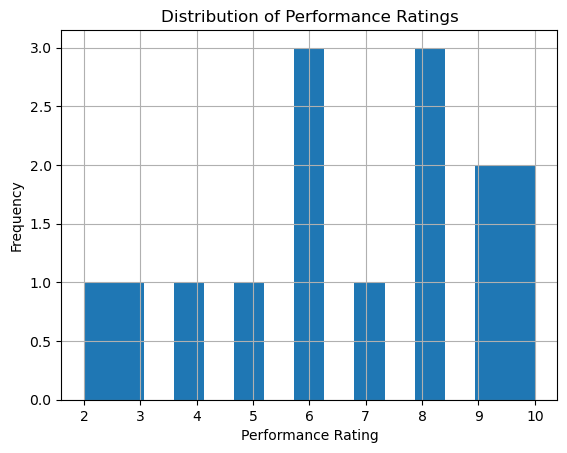

In [111]:
print(df1['Performance_Rating'].describe())               #describing the rating 
df1['Performance_Rating'].hist(bins=15)     #ploting histrogram 
plt.title('Distribution of Performance Ratings')
plt.xlabel('Performance Rating')
plt.ylabel('Frequency')
plt.show()


# Identify factors affecting performance (e.g., experience, department).

In [63]:
correlation_matrix = df1[['Performance_Rating', 'Years_Experience']].corr()
print(correlation_matrix)

                    Performance_Rating  Years_Experience
Performance_Rating            1.000000          0.948406
Years_Experience              0.948406          1.000000


# Calculate average performance ratings for each department.

In [68]:
average_performance_each_department = df1.groupby('Department')['Performance_Rating'].mean()
print(average_performance_each_department)

Department
Finance      4.500000
HR           8.000000
IT           7.666667
Marketing    7.666667
analyst      3.000000
developer    8.000000
Name: Performance_Rating, dtype: float64


# Visualize the performance distribution using histograms.

C:\Users\MY LAPPY HOUSE\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


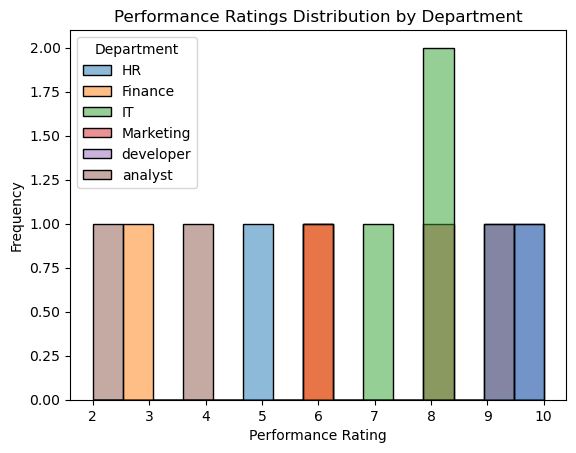

In [105]:
sns.histplot(data=df1, x='Performance_Rating', hue='Department',bins=15)
plt.title('Performance Ratings Distribution by Department')
plt.xlabel('Performance Rating')
plt.ylabel('Frequency')
plt.show()

In [72]:
# Case Study 3: Financial Portfolio Analysis
# Problem Statement:
# You have a dataset with historical stock prices for multiple companies. Perform the following tasks:

# Load and preprocess the stock price data.
# Calculate daily returns for each stock.
# Calculate portfolio returns and risk.
# Optimize the portfolio by adjusting the allocation of each stock.
# Visualize the performance and risk of the optimized portfolio.


In [114]:
import pandas as pd
import numpy as np

In [135]:
data1 = {
    'Date': pd.date_range(start='2023-01-01', end='2023-01-31'),  
    'tsc': np.random.normal(loc=1500,  size=31),  
    'Google': np.random.normal(loc=2000, size=31),
    'wipro': np.random.normal(loc=300,  size=31)
}


In [136]:
df3=pd.DataFrame(data1)
df3

,Date,tsc,Google,wipro
0,2023-01-01,1500.802024,2000.201051,299.473697
1,2023-01-02,1498.357364,2000.513646,299.679596
2,2023-01-03,1498.931786,2000.514011,300.449239
3,2023-01-04,1498.681802,2000.675543,300.129166
4,2023-01-05,1498.893191,2000.145027,300.519907
5,2023-01-06,1499.765378,1999.338981,299.381987
6,2023-01-07,1498.757483,1999.917325,299.172707
7,2023-01-08,1499.554209,1999.411236,301.191191
8,2023-01-09,1500.763916,2001.032777,299.865111
9,2023-01-10,1500.500945,1999.197209,300.754198
